In [1]:
import matplotlib.pyplot as plt
import itertools
import pickle
legend_properties = {'weight':'bold'}

def get_indices_at_hamming_distance(base_index, dimension, hamming_dist):
    indices = []
    positions = range(dimension)

    # Flip exactly 'hamming_dist' bits
    for bits_to_flip in itertools.combinations(positions, hamming_dist):
        mask = 0
        for pos in bits_to_flip:
            mask |= (1 << pos)  # set bit at position `pos` to 1
        new_index = base_index ^ mask  # flip bits using XOR
        indices.append(new_index)

    return indices

dimension = 10
base_index = 2 ** dimension - 1  # [1, 1, ..., 1] in binary → 1023
index_across_distance = []
for hamming_distance in range(1, 11):
    index_list = get_indices_at_hamming_distance(base_index, dimension, hamming_distance)
    print(len(index_list))
    index_across_distance.append(index_list)


10
45
120
210
252
210
120
45
10
1


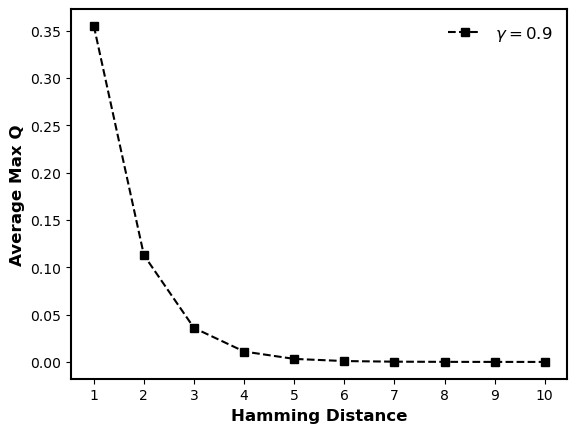

<Figure size 640x480 with 0 Axes>

In [3]:
from Q_learning import Agent
import numpy as np
results = []
gamma = 0.9
for _ in range(1000):
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=gamma)
    max_q_across_distance = []
    for index_list in index_across_distance:
        q_values = []
        for index in index_list:
            q_values.append(max(q_agent.Q_table[index]))
        max_q_value = sum(q_values) / len(q_values)
        max_q_across_distance.append(max_q_value)
    results.append(max_q_across_distance)
average_list = np.mean(results, axis=0)
# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list, "k--s", label=r"$\gamma={0}$".format(gamma))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

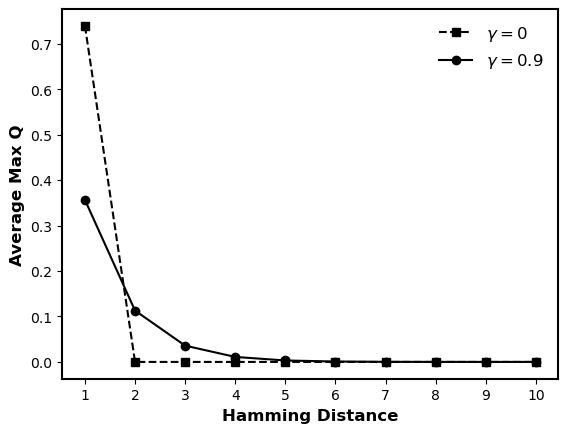

Gamma=0:  [0.73907488 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Gamma=0.9:  [3.56290745e-01 1.12897453e-01 3.57968668e-02 1.09782502e-02
 3.18036153e-03 8.75291573e-04 2.04455546e-04 5.42971227e-05
 1.23518745e-05 0.00000000e+00]


<Figure size 640x480 with 0 Axes>

In [5]:
from Q_learning import Agent
import numpy as np

# gamma = 0
results_gamma_0 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_0.append(max_q_across_distance)
average_list_gamma_0 = np.mean(results_gamma_0, axis=0)

# gamma = 0.9
results_gamma_09 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_09.append(max_q_across_distance)
average_list_gamma_09 = np.mean(results_gamma_09, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list_gamma_0, "k--s", label=r"$\gamma={0}$".format(0))
plt.plot(x, average_list_gamma_09, "k-o", label=r"$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", average_list_gamma_0)
print("Gamma=0.9: ", average_list_gamma_09)

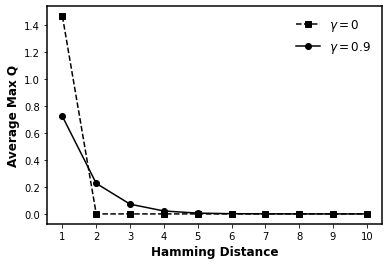

Gamma=0:  [1.46271619 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Gamma=0.9:  [7.21442640e-01 2.25918594e-01 7.21172758e-02 2.17630691e-02
 5.99735055e-03 1.64241428e-03 5.10787361e-04 7.38416715e-05
 5.33870032e-06 0.00000000e+00]


<Figure size 432x288 with 0 Axes>

In [7]:
from Q_learning import Agent
import numpy as np

# gamma = 0
results_gamma_0 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_0.append(max_q_across_distance)
average_list_gamma_0 = np.mean(results_gamma_0, axis=0)

# gamma = 0.9
results_gamma_09 = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
    max_q_across_distance = []
    for index_list in index_across_distance:
        max_q_values = []
        for index in index_list:
            max_q_values.append(max(q_agent.Q_table[index]))
        ave_max_q_value = sum(max_q_values) / len(max_q_values)
        max_q_across_distance.append(ave_max_q_value)
    results_gamma_09.append(max_q_across_distance)
average_list_gamma_09 = np.mean(results_gamma_09, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 11)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, average_list_gamma_0, "k--s", label=r"$\gamma={0}$".format(0))
plt.plot(x, average_list_gamma_09, "k-o", label=r"$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Hamming Distance", fontweight='bold', fontsize=12)
plt.ylabel('Average Max Q', fontweight='bold', fontsize=12)
plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"\Max_Q_across_Hamming.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", average_list_gamma_0)
print("Gamma=0.9: ", average_list_gamma_09)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

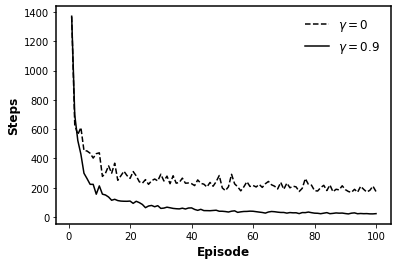

Gamma=0:  [1368.42  630.85  563.29  611.5   453.98  451.19  435.65  403.    432.76
  438.62  277.6   299.39  350.07  299.45  367.78  251.04  281.74  313.19
  283.24  264.08  310.88  281.27  241.    231.29  255.7   223.52  247.88
  259.9   246.98  292.42  246.32  279.45  227.77  282.15  231.45  236.14
  265.79  231.28  232.6   227.99  214.89  253.63  230.16  224.64  205.26
  236.31  210.48  241.83  283.63  198.83  180.45  206.87  291.88  226.99
  206.68  179.04  206.25  241.47  208.9   215.8   205.49  222.85  202.66
  227.47  243.27  220.46  210.88  191.92  237.02  189.89  231.86  199.93
  210.96  206.03  174.4   196.18  262.76  223.28  217.98  180.35  177.74
  201.24  216.82  180.8   219.11  172.63  189.94  185.56  213.63  187.58
  174.74  168.65  189.5   169.54  210.17  189.    170.82  183.03  210.96
  173.69]
Gamma=0.9:  [1371.31  697.52  522.44  429.09  299.2   262.57  223.51  223.41  156.07
  212.76  156.51  150.76  136.96  114.78  121.34  112.64  109.11  108.01
  107.74  109.15   

<Figure size 432x288 with 0 Axes>

In [10]:
# Time to Solution as Organizational Performance
from Q_learning import Agent
import numpy as np

# gamma = 0
steps_gamma_0 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_gamma_0 = np.mean(steps_across_episode_agent, axis=0)

# gamma = 0.9
steps_gamma_09 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=2)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0.9)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_gamma_09 = np.mean(steps_across_episode_agent, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 101)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, steps_gamma_0, "k--", label="$\gamma={0}$".format(0))
plt.plot(x, steps_gamma_09, "k-", label="$\gamma={0}$".format(0.9))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Episode", fontweight='bold', fontsize=12)
plt.ylabel('Steps', fontweight='bold', fontsize=12)
# plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Steps_across_episode.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Gamma=0: ", steps_gamma_0)
print("Gamma=0.9: ", steps_gamma_09)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

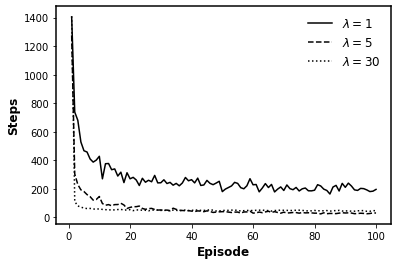

Lambda=5:  [1275.16  304.05  230.12  192.87  180.9   159.56  145.02  120.6   125.05
  146.24   96.92   85.04   89.41   81.04   89.38   89.91   98.66   86.73
   62.28   69.77   74.64   74.88   79.19   62.44   56.34   61.29   62.89
   54.95   51.09   51.97   48.9    51.34   46.18   64.36   55.92   49.46
   48.15   46.37   47.18   43.78   40.7    45.37   43.5    39.92   45.62
   41.09   34.46   36.83   38.66   39.92   40.51   36.77   34.1    36.56
   37.07   29.64   37.7    38.17   43.41   29.78   31.4    37.06   32.77
   38.16   43.05   34.13   40.08   34.17   29.2    36.34   30.47   31.73
   34.06   33.55   29.3    34.02   31.27   32.16   31.37   29.35   29.53
   24.12   32.08   25.67   27.53   27.13   26.24   29.59   32.56   30.61
   31.62   30.22   25.72   26.74   28.94   27.6    25.26   27.     31.15
   30.37]
Lambda=30:  [1409.62  110.9    80.09   71.56   65.37   61.5    62.58   58.39   57.59
   59.59   55.65   54.01   52.4    52.38   52.17   54.75   56.38   50.26
   52.57   53.45  

<Figure size 432x288 with 0 Axes>

In [2]:
# Time to Solution as Organizational Performance
# add lambda, the length of updated preceding state-action pairs
from Q_learning import Agent
import numpy as np

# lambda_ = 1
steps_lambda_1 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn(alpha=0.2, gamma=0)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_1 = np.mean(steps_across_episode_agent, axis=0)

lambda_ = 5
steps_lambda_5 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn_with_lambda(alpha=0.2, gamma=0, lambda_=lambda_)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_5 = np.mean(steps_across_episode_agent, axis=0)

lambda_ = 30
steps_lambda_30 = []
steps_across_episode_agent = []
for _ in range(100):
    np.random.seed(None)
    q_agent = Agent(N=10, peak=1)
    steps_across_episode = []
    for index in range(100):
        q_agent.learn_with_lambda(alpha=0.2, gamma=0.9, lambda_=lambda_)
        steps_across_episode.append(q_agent.steps)
    steps_across_episode_agent.append(steps_across_episode)
steps_lambda_30 = np.mean(steps_across_episode_agent, axis=0)

# Figure 1: Ave Max Q across Hamming Distance
x =  range(1, 101)
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, steps_lambda_1, "k-", label="$\lambda={0}$".format(1))
plt.plot(x, steps_lambda_5, "k--", label="$\lambda={0}$".format(5))
plt.plot(x, steps_lambda_30, "k:", label="$\lambda={0}$".format(30))
# plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel("Episode", fontweight='bold', fontsize=12)
plt.ylabel('Steps', fontweight='bold', fontsize=12)
# plt.xticks(x)
# ax.set_ylim(0, 0.7)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(r"Steps_across_episode_lambda.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print("Lambda=5: ", steps_lambda_5)
print("Lambda=30: ", steps_lambda_30)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

[]
